#About Dataset
link https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets

Understanding the Underlying Causes and Their Impact on Today's Students

About the Dataset:

This dataset investigates the root causes of stress among students, derived from a nationwide survey. It includes around 20 key features grouped under five scientifically identified categories:

##Imports

In [1]:
!pip install xgboost
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


##Loading the data

In [2]:
df = pd.read_csv("Stress_Dataset.csv")

##Exploring the data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [4]:
df["Which type of stress do you primarily experience?"].value_counts()


,count
Which type of stress do you primarily experience?,
Eustress (Positive Stress) - Stress that motivates and enhances performance.,768
No Stress - Currently experiencing minimal to no stress.,43
Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.,32


In [5]:
df.isnull().sum()

,0
Gender,0
Age,0
Have you recently experienced stress in your life?,0
Have you noticed a rapid heartbeat or palpitations?,0
Have you been dealing with anxiety or tension recently?,0
Do you face any sleep problems or difficulties falling asleep?,0
Have you been dealing with anxiety or tension recently?.1,0
Have you been getting headaches more often than usual?,0
Do you get irritated easily?,0
Do you have trouble concentrating on your academic tasks?,0


In [6]:
df.duplicated().sum()     # there can be duplicates so no worrys

np.int64(27)

##Preprocessing

In [7]:
df["Which type of stress do you primarily experience?"].value_counts()

,count
Which type of stress do you primarily experience?,
Eustress (Positive Stress) - Stress that motivates and enhances performance.,768
No Stress - Currently experiencing minimal to no stress.,43
Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.,32


In [8]:
stress_mapping = {
    'Eustress (Positive Stress) - Stress that motivates and enhances performance.': 0,
    'No Stress - Currently experiencing minimal to no stress.': 1,
    'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.': 2
}

df['StressType_Encoded'] = df['Which type of stress do you primarily experience?'].map(stress_mapping)


In [9]:
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?,StressType_Encoded
0,0,20,3,4,2,5,1,2,1,2,...,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...,0
1,0,20,2,3,2,1,1,1,1,4,...,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...,0
2,0,20,5,4,2,2,1,3,4,2,...,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...,0
3,1,20,3,4,3,2,2,3,4,3,...,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...,0
4,0,20,3,3,3,2,2,4,4,4,...,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...,0


In [10]:
def remove(df,column):
  df_copy  = df.copy()
  df_copy = df_copy.drop(columns=[column])
  return df_copy

In [11]:
df = remove(df,"Which type of stress do you primarily experience?")

In [12]:
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,StressType_Encoded
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,0
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,0
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,0
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,0
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,0


#Feature Selection , Training and Model building

In [13]:
x = df.drop('StressType_Encoded', axis=1)
y = df['StressType_Encoded']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,  # Using 20% of the data for testing
    random_state=42, # Setting a random state for reproducibility
    stratify=y
)

In [15]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)


In [28]:
from sklearn.utils.class_weight import compute_sample_weight
sw = compute_sample_weight("balanced", y_train_res)  # after SMOTE
xgb.fit(X_train_res, y_train_res, sample_weight=sw)


XGBClassifier(base_score=None, booster=None, cale_pos_weight=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, ...)

In [29]:
xgb = XGBClassifier(
    objective="multi:softprob",  # probability outputs for multiclass
    num_class=3,                 # number of classes (0,1,2)
    eval_metric="mlogloss",      # multiclass log-loss
    n_estimators=500,
    learning_rate=0.01,
    max_depth=4,
    subsample=0.8,
    cale_pos_weight=None,
    colsample_bytree=0.8,
    tree_method="hist",          # "gpu_hist" if GPU available
    random_state=42
)

xgb.fit(X_train_res, y_train_res)

y_pred = xgb.predict(x_test)
y_proba = xgb.predict_proba(x_test)


              precision    recall  f1-score   support

           0     0.9503    0.9935    0.9714       154
           1     0.8571    0.6667    0.7500         9
           2     1.0000    0.1667    0.2857         6

    accuracy                         0.9467       169
   macro avg     0.9358    0.6089    0.6690       169
weighted avg     0.9471    0.9467    0.9353       169



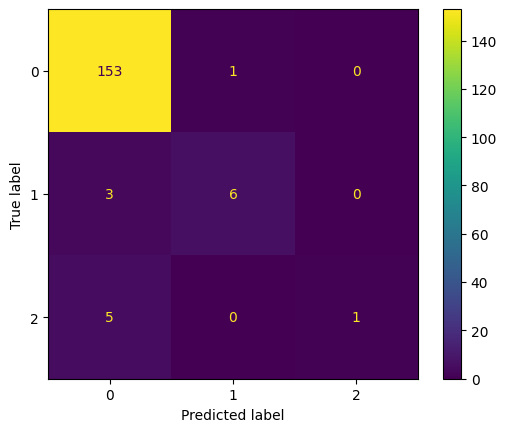

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


Samples are really less hence model is ignoring class 2 and recall stuck at 0.16
if you have solution then you can help me